In [1]:
# simple encoder - decoder example
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import UpSampling1D
from keras.layers import Conv1D
import scipy.io as io
import scipy.misc
from matplotlib.pyplot import imshow, plot, show

/Users/granty/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load data 
mat_contents = io.loadmat('/Users/granty/Data/CS230_train/keras_ex7.mat')
Xin = mat_contents['X']
Xin = Xin[:,0:100,:]
Yout = mat_contents['Yout']
Yout = Yout[:,0:200]
num_samples, X_t, num_notes = Xin.shape
Y_t = Yout.shape[1]
print(Yout.shape)
print(Xin.shape)
X_train = Xin.reshape(num_samples,X_t,num_notes)
Y_train = Yout.reshape(num_samples,Y_t,1)
print(Xin.mean())
print(Xin.var())
print(num_notes)

(126, 200)
(126, 100, 176)
0.05412382756132756
0.051194438851439324
176


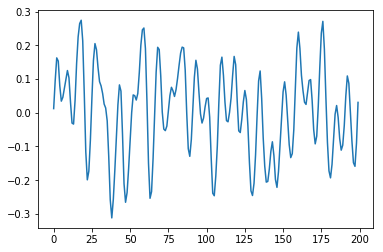

In [3]:
plot(Y_train[100][:].flatten())

In [46]:
def bidi_LSTM(X_t, num_notes, Y_t ):
    # define bidirectional LSTM configuration
    n_neurons_encoder = 100 # refers to size of Memory matrices (can be anything)
    n_neurons_decoder = 100

    # create LSTM
    model = Sequential()
    #model.add(Conv1D(4,2,strides=1,padding='valid',kernel_initializer='glorot_uniform'))
    # encoder
    model.add(Bidirectional(LSTM(n_neurons_encoder,return_sequences = True),input_shape = (X_t,num_notes)))
    model.add(UpSampling1D(size=2))
    model.add(Conv1D(128,5,strides=1,padding='same', kernel_initializer='glorot_uniform'))
    #model.add(Bidirectional(LSTM(n_neurons_decoder, return_sequences = True), input_shape=(Y_t,10)))
    #model.add(Bidirectional(LSTM(n_neurons_encoder)))
    # decoder
    #model.add(RepeatVector(Y_t))
    #model.add(UpSampling1D(size=2))
    #model.add(Bidirectional(LSTM(n_neurons_decoder, return_sequences = True), input_shape=(Y_t,n_neurons_decoder)))
    #model.add(Bidirectional(LSTM(n_neurons_decoder)))
    #model.add(Bidirectional(LSTM(n_neurons_decoder, return_sequences = True), input_shape=(Y_t,n_neurons_decoder)))
    model.add(Bidirectional(LSTM(n_neurons_decoder, return_sequences = True), input_shape=(Y_t,n_neurons_decoder)))
    model.add(TimeDistributed(Dense(1)))

    return model

In [47]:
model = bidi_LSTM(X_t,num_notes,Y_t)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_32 (Bidirectio (None, 100, 200)          221600    
_________________________________________________________________
up_sampling1d_6 (UpSampling1 (None, 200, 200)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 128)          128128    
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 200, 200)          183200    
_________________________________________________________________
time_distributed_13 (TimeDis (None, 200, 1)            201       
Total params: 533,129
Trainable params: 533,129
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
n_batch = 20 # number of training examples 
n_epoch = 25
#print(model.summary())
# train LSTM
model.fit(X_train, Y_train, epochs=n_epoch, batch_size=n_batch)
# evaluate


Epoch 1/25
126/126 [==============================] - 5s 42ms/step - loss: 0.0017
Epoch 2/25
126/126 [==============================] - 5s 41ms/step - loss: 0.0018
Epoch 3/25
126/126 [==============================] - 5s 41ms/step - loss: 0.0017
Epoch 4/25
126/126 [==============================] - 5s 41ms/step - loss: 0.0017
Epoch 5/25
126/126 [==============================] - 5s 44ms/step - loss: 0.0017
Epoch 6/25
126/126 [==============================] - 5s 43ms/step - loss: 0.0016
Epoch 7/25
126/126 [==============================] - 5s 42ms/step - loss: 0.0015
Epoch 8/25
126/126 [==============================] - 5s 41ms/step - loss: 0.0016
Epoch 9/25
126/126 [==============================] - 5s 41ms/step - loss: 0.0015
Epoch 10/25
126/126 [==============================] - 5s 42ms/step - loss: 0.0016
Epoch 11/25
126/126 [==============================] - 5s 42ms/step - loss: 0.0015
Epoch 12/25
126/126 [==============================] - 5s 41ms/step - loss: 0.0015
Epoch 13/25
1

In [83]:
# evaluate 
result = model.predict(X_train, batch_size=n_batch)
#print(result)

(126, 200, 1)


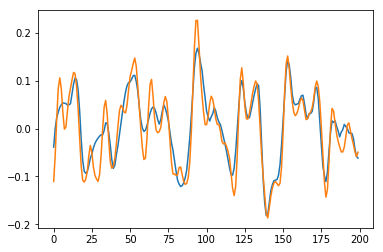

In [84]:
print(result.shape)
#plot(X_train[100,1:50,:])
plot(result[15,:])
plot(Y_train[15,:])


In [41]:
print(np.sum((result.flatten()-Y_train.flatten())**2)/44100)
print(result.flatten()[10:15])

0.0107055197050432
[-0.0141605  -0.01431329 -0.01438704 -0.01441133 -0.01440697]
